In [1]:
import pandas as pd
import matplotlib as plt

df = pd.read_csv("/content/Yahoo_Finance.csv")

In [2]:
df.head(5)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2001-01-01,16.5000,16.500000,16.50,16.50,12.229188,0
1,1,2001-01-02,15.9875,16.299999,15.91,16.25,12.043896,1607584
2,2,2001-01-03,15.8775,15.947500,15.50,15.90,11.784488,506560
3,3,2001-01-04,16.1250,16.875000,15.75,16.50,12.229188,894416
4,4,2001-01-05,16.5000,16.500000,16.50,16.50,12.229188,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5273 non-null   int64  
 1   Date        5273 non-null   object 
 2   Open        5273 non-null   float64
 3   High        5273 non-null   float64
 4   Low         5273 non-null   float64
 5   Close       5273 non-null   float64
 6   Adj Close   5273 non-null   float64
 7   Volume      5273 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 329.7+ KB


In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [5]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5268,False
5269,False
5270,False
5271,False


In [6]:
df["Date"] = pd.to_datetime(df["Date"])

df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [7]:
df = df.fillna(method='ffill')

<ipython-input-7-2c428d02cf67>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [9]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=33c5253660ac0e31dfb6226428801e788f208450133489b87564a061621837c2
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [10]:
import ta

df['SMA_20'] = ta.trend.sma_indicator(df['Close'], window=20)
df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)

In [11]:
# Bollinger Bands
bb = ta.volatility.BollingerBands(close=df['Close'], window=20, window_dev=2)
df['BB_High'] = bb.bollinger_hband()
df['BB_Low'] = bb.bollinger_lband()

df.tail()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,RSI,BB_High,BB_Low
Date,,,,,,,,,,,,
2021-08-17,5268,313.600006,314.049988,310.850006,311.700012,311.700012,275059,313.637500,313.317220,49.381236,327.053676,300.221324
2021-08-18,5269,310.450012,310.950012,304.600006,307.000000,307.000000,396460,313.562500,312.715580,46.077589,327.108857,300.016143
2021-08-19,5270,303.000000,304.250000,297.399994,303.350006,303.350006,563314,313.115001,311.823621,43.636096,327.371332,298.858670
2021-08-20,5271,302.750000,303.600006,298.299988,302.000000,302.000000,413174,312.325001,310.888038,42.734173,327.193270,297.456733
2021-08-23,5272,306.100006,307.899994,305.450012,306.600006,306.600006,324089,312.055002,310.479654,46.771336,327.131732,296.978271


In [23]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['SMA_20', 'EMA_20', 'RSI', 'BB_High', 'BB_Low', 'Close', 'Open', 'High', 'Low', 'Adj Close', 'Volume']
scaler = MinMaxScaler()
df_normalized = df[features_to_normalize].dropna()
normalized_values = scaler.fit_transform(df_normalized)
df_normalized_temp = pd.DataFrame(normalized_values, index=df_normalized.index, columns=features_to_normalize)
df.update(df_normalized_temp)

print(df.head())

features = df[['Close', 'SMA_20', 'EMA_20', 'RSI']].dropna()
model = IsolationForest(contamination=0.01, random_state=42)
anomaly_predictions = model.fit_predict(features)

df['anomaly_if'] = 0
df.loc[features.index, 'anomaly_if'] = anomaly_predictions
df['anomaly_if'] = df['anomaly_if'].map({1: 0, -1: 1})

            Unnamed: 0     Open       High    Low  Close  Adj Close  \
Date                                                                  
2001-01-01           0  16.5000  16.500000  16.50  16.50  12.229188   
2001-01-02           1  15.9875  16.299999  15.91  16.25  12.043896   
2001-01-03           2  15.8775  15.947500  15.50  15.90  11.784488   
2001-01-04           3  16.1250  16.875000  15.75  16.50  12.229188   
2001-01-05           4  16.5000  16.500000  16.50  16.50  12.229188   

               Volume  SMA_20  EMA_20  RSI  BB_High  BB_Low  anomaly_if  
Date                                                                     
2001-01-01        0.0     NaN     NaN  NaN      NaN     NaN         NaN  
2001-01-02  1607584.0     NaN     NaN  NaN      NaN     NaN         NaN  
2001-01-03   506560.0     NaN     NaN  NaN      NaN     NaN         NaN  
2001-01-04   894416.0     NaN     NaN  NaN      NaN     NaN         NaN  
2001-01-05        0.0     NaN     NaN  NaN      NaN     Na

In [12]:
from sklearn.ensemble import IsolationForest

# relevant features for anomaly detection
features = df[['Close', 'SMA_20', 'EMA_20', 'RSI']]

# Fit Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
anomaly_predictions = model.fit_predict(features.dropna())

df['anomaly_if'] = 0

df.loc[features.dropna().index, 'anomaly_if'] = anomaly_predictions

# Mark anomalies
df['anomaly_if'] = df['anomaly_if'].map({1: 0, -1: 1})

Detected anomalies: 0


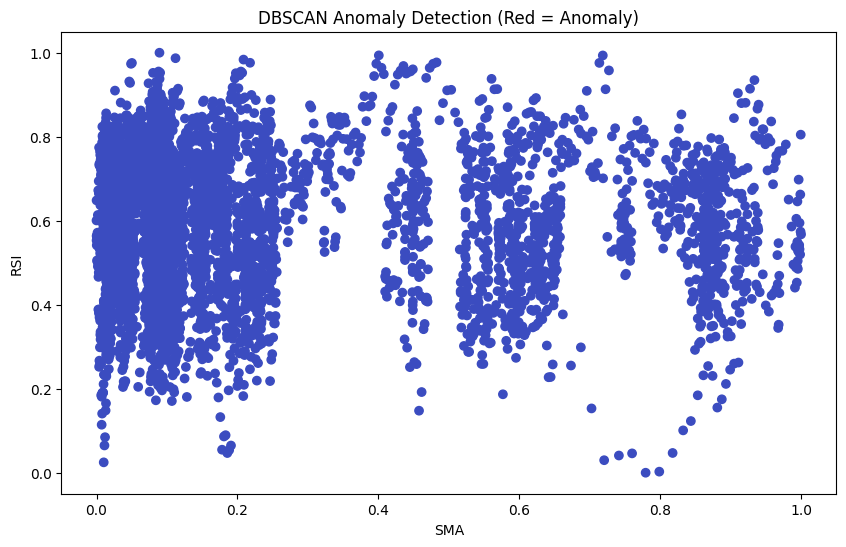

In [30]:
from sklearn.cluster import DBSCAN

features = ['SMA_20', 'EMA_20', 'RSI', 'BB_High', 'BB_Low']
df_dbscan = df[features].dropna()
X = df_dbscan.values

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

labels = dbscan.labels_
df['anomaly'] = False

df.loc[df_dbscan.index, 'anomaly'] = (labels == -1)
print(f"Detected anomalies: {df['anomaly'].sum()}")

plt.figure(figsize=(10,6))
plt.scatter(df['SMA_20'], df['RSI'], c=df['anomaly'], cmap='coolwarm', marker='o')
plt.xlabel('SMA')
plt.ylabel('RSI')
plt.title('DBSCAN Anomaly Detection (Red = Anomaly)')
plt.show()

In [13]:
!pip install prophet

In [14]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = df[['Close']].reset_index()
prophet_df.columns = ['ds', 'y']

# Train model
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6mvtwo2t/annwf8l_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6mvtwo2t/4nrkpnvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50809', 'data', 'file=/tmp/tmp6mvtwo2t/annwf8l_.json', 'init=/tmp/tmp6mvtwo2t/4nrkpnvt.json', 'output', 'file=/tmp/tmp6mvtwo2t/prophet_modelstx2g8q6/prophet_model-20250517164947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:49:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:49:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


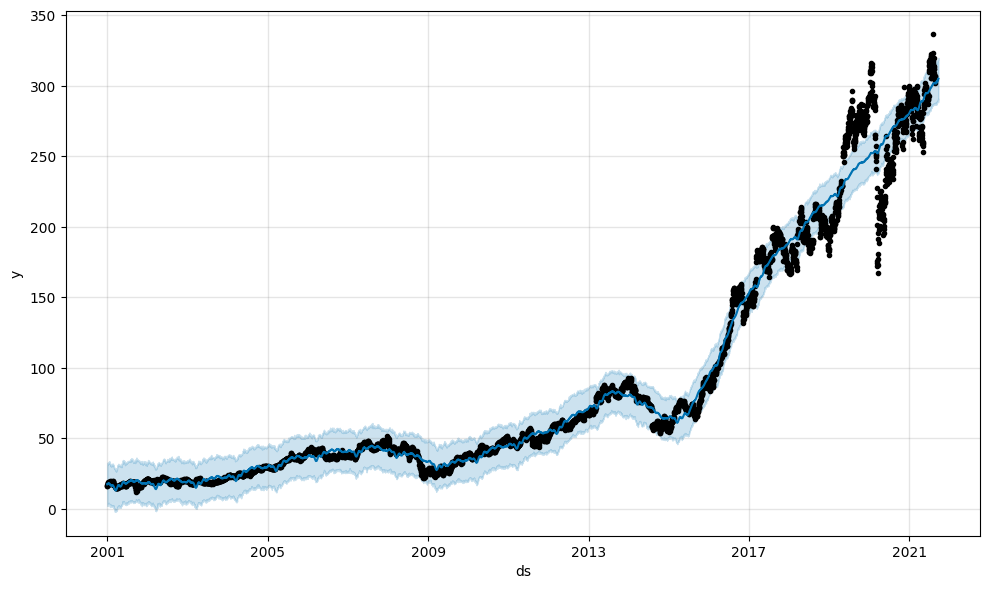

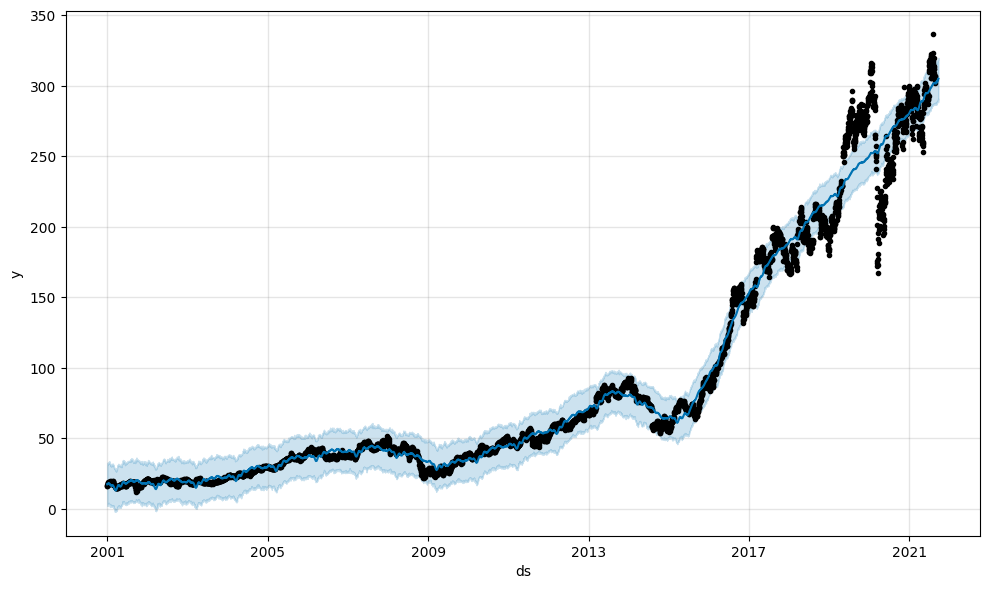

In [15]:
# Predict future
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot
model.plot(forecast)


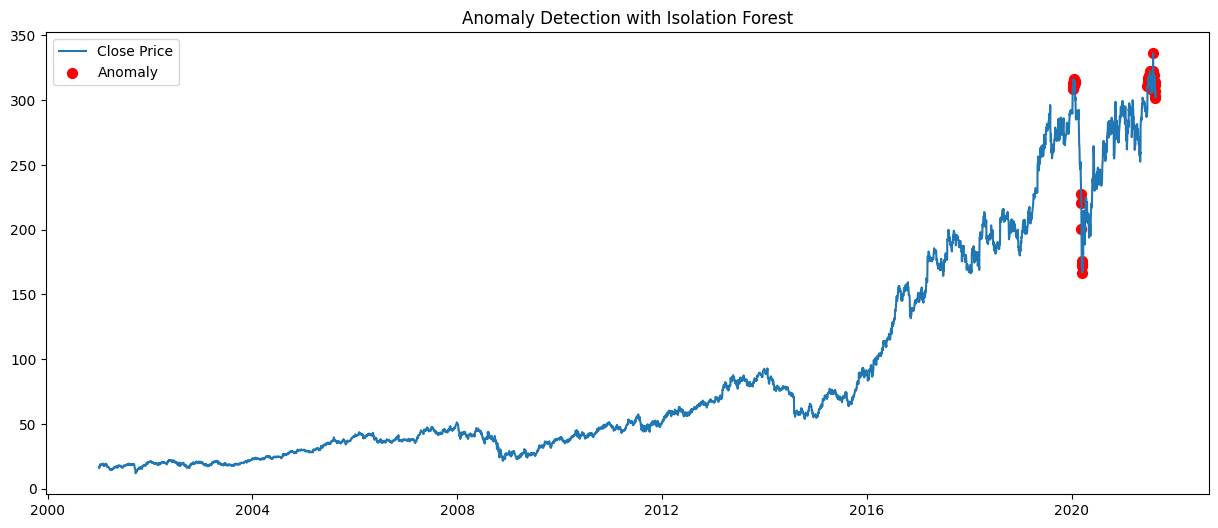

In [16]:
import matplotlib.pyplot as plt

# Plot price and anomalies
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.scatter(df[df['anomaly_if'] == 1].index, df[df['anomaly_if'] == 1]['Close'],
            color='red', label='Anomaly', s=50)
plt.title('Anomaly Detection with Isolation Forest')
plt.legend()
plt.show()

# **Outcome: Tool or Report**
**Anomaly detection tool:**
*   Calculates indicators.
*   Applies Isolation Forest for anomaly detection.
*   Optionally uses Prophet for trend deviation forecasting.
*   Visualizes detected anomalies.




